# Governance Dataset:
The governance dataset has information about not-for-profits such as the number of voting memters and volunteers.  Additionally, it includes a number of boolean datatype fields related to policies or disclosures such as a conflict of interest policy or a conflict disclosure.  The evidence of robust policies and disclosure practices are indicators of organizations with strong internal controls.

In [6]:
import pandas as pd

# from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## IMPORT DATA

In [8]:
# examine all fields
df_all_fields = pd.read_csv('02.data/primary_raw_datasets/Open990_Governance_Snack_Set_Public_2019-01-15.csv', nrows=5)

In [9]:
df_all_fields.head()

,ein,name_org,tax_date_begin,tax_date_end,tax_yr,doing_business_as,phone,website,address,city,state,country,zip,org_form.association,org_form.corp,org_form.other_form,org_form.other_form_desc,org_form.trust,formation_yr,grp_exempt_num,state_legaldomicile,grp_return,grp_subs_all_incl,exempt_status.501c3,exempt_status.501c_any,exempt_status.501c_txt,gross_receipts,ntee_code_nccs,ntee_description_nccs,discontinue_dispose25,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_giftsgrants_tot_prioryr,rev_prgmservice_prioryr,rev_investmt_prioryr,rev_other_prioryr,rev_tot_prioryr,grants_expense_tot_prioryr,benefits_expense_tot_prioryr,salaries_expense_tot_prioryr,fundraiseservfee_expense_tot_prioryr,fundraise_expense_tot_curyr,other_expense_tot_prioryr,expense_tot_prioryr,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_giftsgrants_tot_curyr,rev_prgmservice_curyr,rev_investmt_curyr,rev_other_curyr,rev_tot_curyr,grants_expense_tot_curyr,benefits_expense_tot_curyr,salaries_expense_tot_curyr,fundraiseservfee_expense_tot_curyr,other_expense_tot_curyr,expense_tot_curyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,operate_hospfacility,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy,forms_ownwebsite,comp_currkeypersons_tot,cash_noninterest_endyr,savingtempcash_endyr,pledges_net_endyr,accountreceivable_net_endyr,invest_publicsec_endyr,invest_othersec_endyr,invest_prog_endyr,asset_intangible_endyr,asset_unrestrictnet_endyr,asset_temprestrictnet_endyr,asset_permrestrictnet_endyr,record_id,schema_version,irs_efile_id,random_string
0,391546606,DAYSTAR INC,2017-01-01,2017-12-31,2017,NaN,+1 (414) 385-0334,WWW.DAYSTARINC.ORG,PO BOX 2130,MILWAUKEE,WI,NaN,532012130,NaN,True,NaN,NaN,NaN,1986,NaN,WI,no,NaN,True,NaN,NaN,333897,NaN,NaN,NaN,9,9,8,25.0,4280,0.0,207987,6092,1,-143,213937,0.0,0.0,140200,0.0,21971,92928,233128,-19191,316735,288974,27761,260639,8695,0,4280,273614,0,0,115568,0,115084,230652,42962,325654,254931,70723,no,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN,NaN,16375.0,27988,201.0,17998.0,6009.0,NaN,NaN,NaN,NaN,70723.0,0.0,NaN,391546606_201712,2017v2.2,201831219349300733,MTA0MDA1NjUyMDM1ODQ2NDI1MQ
1,640901077,HERNANDO MAIN STREETCHAMBER OF COMMERCE,2012-01-01,2012-12-31,2012,NaN,+1 (662) 429-9055,www.hernandoms.org,2440 HIGHWAY 51 SOUTH,HERNANDO,MS,NaN,38632,NaN,True,NaN,NaN,NaN,1973,NaN,MS,no,no,NaN,True,6.0,252283,S41,Promotion of Business,NaN,15,15,4,NaN,0,NaN,92322,4740,649,18732,116443,NaN,NaN,87063,NaN,-103606,81181,168244,-51801,89517,7271,82246,81249,40715,296,26417,148677,965,0,83768,0,76994,161727,-13050,72742,3546,69196,no,no,no,no,yes,yes,yes,yes,no,no,no,NaN,yes,yes,yes,yes,no,no,no,no,no,NaN,NaN,45010.0,30403,34216.0,0.0,6738.0,0.0,0.0,0.0,0.0,69196.0,NaN,NaN,640901077_201212,2012v2.0,201321359349303692,MTA0MDA1NzYwNzM0ODkyMTY0Ng
2,522113016,MARYLAND CAPITAL ENTERPRISES INC,2014-10-01,2015-09-30,2015,NaN,+1 (410) 546-1900,WWW.MARYLANDCAPITAL.ORG,PO BOX 213,SALISBURY,MD,NaN,21802,NaN,True,NaN,NaN,NaN,1991,NaN,MD,no,NaN,True,NaN,NaN,1406736,P51,"Financial Counseling, Money Management",NaN,15,15,16,0.0,0,0.0,1324919,0,170539,59726,1555184,0.0,0.0,337154,0.0,0,589747,926901,628283,4376943,2518702,1858241,1091077,0,257136,51865,1400078,0,0,517577,0,386300,903877,496201,5435095,3080653,2354442,no,no,no,no,no,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,NaN,NaN,28139.0,486696,802607.0,119721.0,NaN,NaN,NaN,NaN,NaN,1915868.0,NaN,438574.0,522113016_201509,2014v6.0,201622259349303247,MTA0MDA1NzYyMjEwNzcwOTk1N

In [10]:
# identify governance columns of interest to me
list(enumerate(df_all_fields.columns))[68:89]

[(68, 'relationsamongemployees'),
 (69, 'delegate_management'),
 (70, 'material_diversion'),
 (71, 'memb_or_stockholder'),
 (72, 'memb_elect_board'),
 (73, 'decisions_outside_board'),
 (74, 'govern_body_minutes'),
 (75, 'committee_minutes'),
 (76, 'no_officer_address'),
 (77, 'local_chapt'),
 (78, 'policies_ref_chapt'),
 (79, '990_to_members'),
 (80, 'conflict_interest_policy'),
 (81, 'conflict_disclosure'),
 (82, 'enforce_conflict_policy'),
 (83, 'whistleblower_policy'),
 (84, 'doc_retention_policy'),
 (85, 'ceo_comp_review'),
 (86, 'officer_comp_review'),
 (87, 'in_joint_venture'),
 (88, 'joint_venture_policy')]

In [11]:
# add together columns selected by index and those manually selected
cols = list(df_all_fields.iloc[:, 68:89].columns) + ['ein',
  'tax_yr',
   'voting_memb_ct',
   'voting_indepmemb_ct',
   'employee_tot_ct',
   'volunteer_tot_ct']

In [13]:
# import only fields of interest to me
df = pd.read_csv('02.data/primary_raw_datasets/Open990_Governance_Snack_Set_Public_2019-01-15.csv', usecols=cols)

In [14]:
df.shape

(1453208, 27)

In [15]:
df.head(5)

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy
0,391546606,2017,9,9,8,25.0,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN
1,640901077,2012,15,15,4,NaN,no,no,no,yes,yes,yes,yes,no,no,no,NaN,yes,yes,yes,yes,no,no,no,no,no,NaN
2,522113016,2015,15,15,16,0.0,no,no,no,no,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,NaN
3,454957549,2016,4,0,12,NaN,no,no,no,no,no,no,no,no,no,no,NaN,no,no,no,no,no,no,no,no,no,NaN
4,210502065,2017,28,28,3,0.0,no,no,no,no,yes,no,yes,yes,no,no,NaN,yes,no,NaN,NaN,no,no,yes,no,no,NaN


## CLEAN/ORGANIZE DATA

In [101]:
# examine distribution by years
df.tax_yr.value_counts().sort_index()

2016    237448
2015    226022
2014    208950
2013    189195
2017    178537
2012    169291
2011    138173
2010     97353
2018      8239
Name: tax_yr, dtype: int64

In [16]:
# although I'm only focusing on 2017 in the executive compensation dataset
# only including 2017 here caused me to miss about 3/4 of
# executive compensation payments
# including two prior years allows me to match up with almost 
# all executive compensation payments
df = df[(df.tax_yr == 2017) |
       (df.tax_yr == 2016) |
       (df.tax_yr == 2015)]

In [122]:
df.shape

(642007, 27)

In [17]:
# which fields are more than 60% null?
(df.isnull().mean() * 100)[(df.isnull().mean() * 100) > 60].index

Index(['policies_ref_chapt', 'joint_venture_policy'], dtype='object')

In [18]:
# drop columns that are mostly null
df.drop(['policies_ref_chapt', 'joint_venture_policy'], axis=1, inplace=True)

In [19]:
# examine data types of columns
# many of the binary colums are object
# I need to convert to bool
df.dtypes

ein                           int64
tax_yr                        int64
voting_memb_ct                int64
voting_indepmemb_ct           int64
employee_tot_ct               int64
volunteer_tot_ct            float64
relationsamongemployees      object
delegate_management          object
material_diversion           object
memb_or_stockholder          object
memb_elect_board             object
decisions_outside_board      object
govern_body_minutes          object
committee_minutes            object
no_officer_address           object
local_chapt                  object
990_to_members               object
conflict_interest_policy     object
conflict_disclosure          object
enforce_conflict_policy      object
whistleblower_policy         object
doc_retention_policy         object
ceo_comp_review              object
officer_comp_review          object
in_joint_venture             object
dtype: object

In [20]:
# convert object columns to boolean
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column] == 'yes'

In [21]:
# verify results
df.dtypes

ein                           int64
tax_yr                        int64
voting_memb_ct                int64
voting_indepmemb_ct           int64
employee_tot_ct               int64
volunteer_tot_ct            float64
relationsamongemployees        bool
delegate_management            bool
material_diversion             bool
memb_or_stockholder            bool
memb_elect_board               bool
decisions_outside_board        bool
govern_body_minutes            bool
committee_minutes              bool
no_officer_address             bool
local_chapt                    bool
990_to_members                 bool
conflict_interest_policy       bool
conflict_disclosure            bool
enforce_conflict_policy        bool
whistleblower_policy           bool
doc_retention_policy           bool
ceo_comp_review                bool
officer_comp_review            bool
in_joint_venture               bool
dtype: object

In [22]:
# examine for null values by percent
df.isnull().mean() * 100

ein                          0.000000
tax_yr                       0.000000
voting_memb_ct               0.000000
voting_indepmemb_ct          0.000000
employee_tot_ct              0.000000
volunteer_tot_ct            26.682731
relationsamongemployees      0.000000
delegate_management          0.000000
material_diversion           0.000000
memb_or_stockholder          0.000000
memb_elect_board             0.000000
decisions_outside_board      0.000000
govern_body_minutes          0.000000
committee_minutes            0.000000
no_officer_address           0.000000
local_chapt                  0.000000
990_to_members               0.000000
conflict_interest_policy     0.000000
conflict_disclosure          0.000000
enforce_conflict_policy      0.000000
whistleblower_policy         0.000000
doc_retention_policy         0.000000
ceo_comp_review              0.000000
officer_comp_review          0.000000
in_joint_venture             0.000000
dtype: float64

In [23]:
# replace null volunteers with zero
# change data type to int
df.volunteer_tot_ct.fillna(0, inplace=True)
df.volunteer_tot_ct = df.volunteer_tot_ct.astype(int)

In [24]:
df.head()

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
0,391546606,2017,9,9,8,25,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
2,522113016,2015,15,15,16,0,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,False
3,454957549,2016,4,0,12,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,210502065,2017,28,28,3,0,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False,False
5,473214712,2016,4,4,0,4,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,True,False,False,False


In [25]:
df.shape

(642007, 25)

In [26]:
# select only the latest governance data
# based on ein number
# delete the rest
df = df.sort_values(['ein', 'tax_yr'], ascending=False).drop_duplicates('ein')

In [27]:
df.shape

(269928, 25)

In [28]:
df.corr()

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
ein,1.000000,0.009404,0.004926,0.000668,0.001856,-0.000846,-0.026858,-0.007156,0.001401,0.004999,0.001447,-0.004572,-0.031307,-0.033951,-0.002299,0.014556,-0.036646,-0.013133,-0.017461,-0.017949,-0.009960,0.006361,0.017121,0.013571,0.012647
tax_yr,0.009404,1.000000,0.003136,0.000070,0.005140,-0.004050,-0.031763,0.016789,-0.005667,0.003585,0.012245,0.005959,0.045314,0.038347,-0.013856,-0.000160,0.028273,0.048224,0.049333,0.054723,0.062537,0.063276,0.055411,0.040328,-0.011449
voting_memb_ct,0.004926,0.003136,1.000000,0.303474,0.002144,0.000186,-0.007036,-0.005338,0.000226,0.031623,0.030368,0.026831,0.007199,0.012243,0.001214,0.038310,-0.010676,-0.006553,-0.005201,-0.005137,-0.003552,0.001451,-0.000081,0.005059,-0.000911
voting_indepmemb_ct,0.000668,0.000070,0.303474,1.000000,0.000340,0.000062,-0.002001,-0.002768,-0.000102,0.010865,0.010200,0.008209,-0.003021,0.001472,-0.000166,0.012682,-0.002241,-0.004296,-0.003550,-0.003397,-0.003002,0.000258,-0.000015,0.000571,-0.000698
employee_tot_ct,0.001856,0.005140,0.002144,0.000340,1.000000,0.003972,0.024340,-0.000693,0.016069,0.024605,0.025756,0.036358,0.013866,0.018868,0.000375,0.018929,0.019734,0.037944,0.041533,0.043731,0.052677,0.046336,0.049089,0.058304,0.127220
volunteer_tot_ct,-0.000846,-0.004050,0.000186,0.000062,0.003972,1.000000,-0.000922,-0.001001,0.000034,-0.000799,-0.000996,-0.000699,0.001095,0.001704,-0.000511,0.006371,-0.001391,0.003288,0.000078,0.000331,0.000939,0.000546,0.001230,0.001727,0.000224
relationsamongemployees,-0.026858,-0.031763,-0.007036,-0.002001,0.024340,-0.000922,1.000000,0.004801,0.003505,-0.017390,-0.004571,-0.007969,0.027565,-0.015581,0.015062,-0.018832,0.046812,0.042801,0.043622,0.043124,0.015521,0.008746,0.006709,0.022830,0.030545
delegate_management,-0.007156,0.016789,-0.005338,-0.002768,-0.000693,-0.001001,0.004801,1.000000,0.005883,0.075290,0.094850,0.066569,0.035886,-0.012211,0.002235,-0.001489,0.030740,0.063891,0.061634,0.071628,0.065796,0.085790,-0.037293,-0.020146,0.008370
material_diversion,0.001401,-0.005667,0.000226,-0.000102,0.016069,0.000034,0.003505,0.005883,1.000000,0.005886,0.004040,0.005409,-0.005603,-0.003678,0.006491,0.005062,0.003316,-0.001808,-0.001654,-0.000055,0.000636,-0.000414,0.003386,0.004926,0.007871
memb_or_stockholder,0.004999,0.003585,0.031623,0.010865,0.024605,-0.000799,-0.017390,0.075290,0.005886,1.000000,0.800606,0.610439,0.107413,0.043792,0.005068,0.139200,0.028378,0.041840,0.049580,0.064516,0.063395,0.087379,0.037993,0.057398,0.055673


(25.5, -0.5)

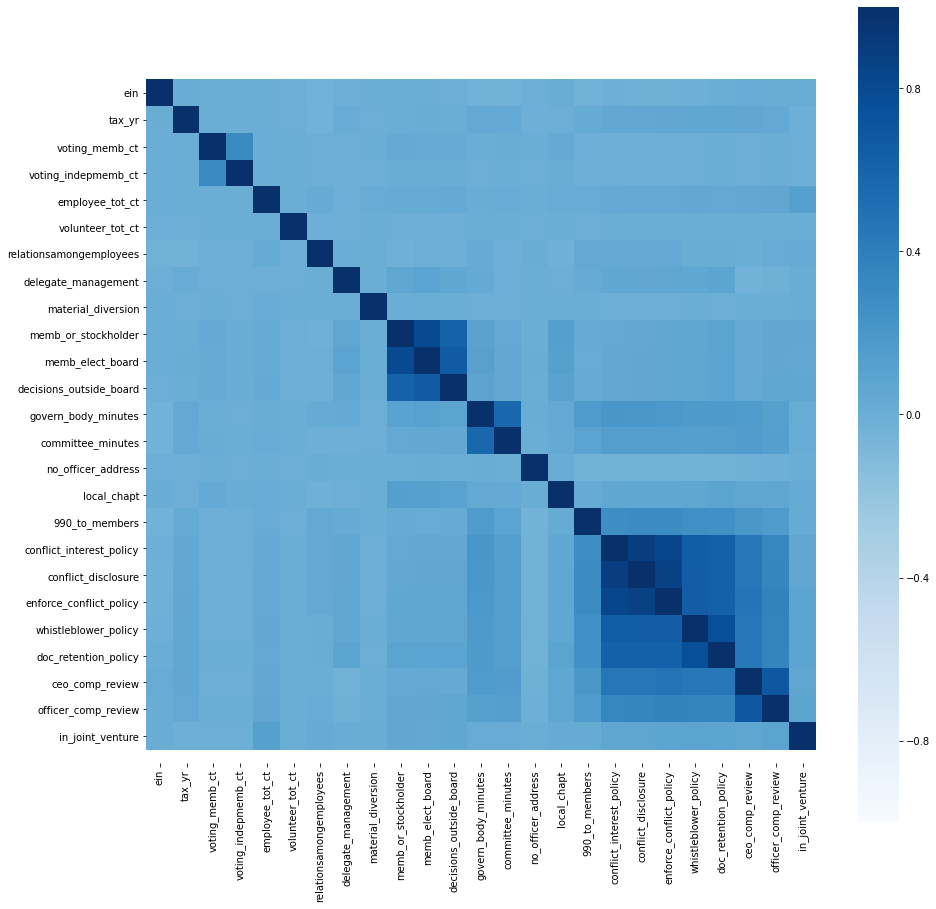

In [29]:
# compare features using a heatmap
plt.figure(figsize=(15, 15))

ax = sns.heatmap(df.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=False, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## EDA

In [160]:
# responses to governance questions
list(enumerate(df.columns))

[(0, 'ein'),
 (1, 'tax_yr'),
 (2, 'voting_memb_ct'),
 (3, 'voting_indepmemb_ct'),
 (4, 'employee_tot_ct'),
 (5, 'volunteer_tot_ct'),
 (6, 'relationsamongemployees'),
 (7, 'delegate_management'),
 (8, 'material_diversion'),
 (9, 'memb_or_stockholder'),
 (10, 'memb_elect_board'),
 (11, 'decisions_outside_board'),
 (12, 'govern_body_minutes'),
 (13, 'committee_minutes'),
 (14, 'no_officer_address'),
 (15, 'local_chapt'),
 (16, '990_to_members'),
 (17, 'conflict_interest_policy'),
 (18, 'conflict_disclosure'),
 (19, 'enforce_conflict_policy'),
 (20, 'whistleblower_policy'),
 (21, 'doc_retention_policy'),
 (22, 'ceo_comp_review'),
 (23, 'officer_comp_review'),
 (24, 'in_joint_venture')]

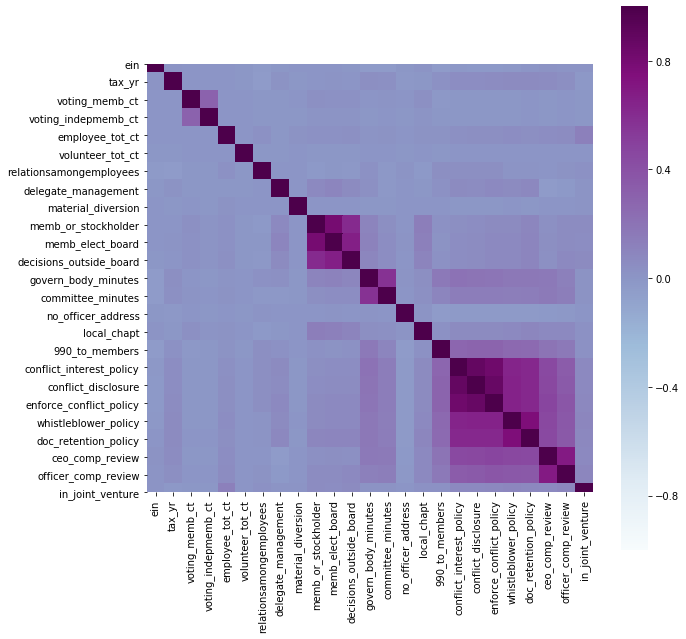

In [166]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(df.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, 
                 annot=False, 
                 cmap='BuPu')

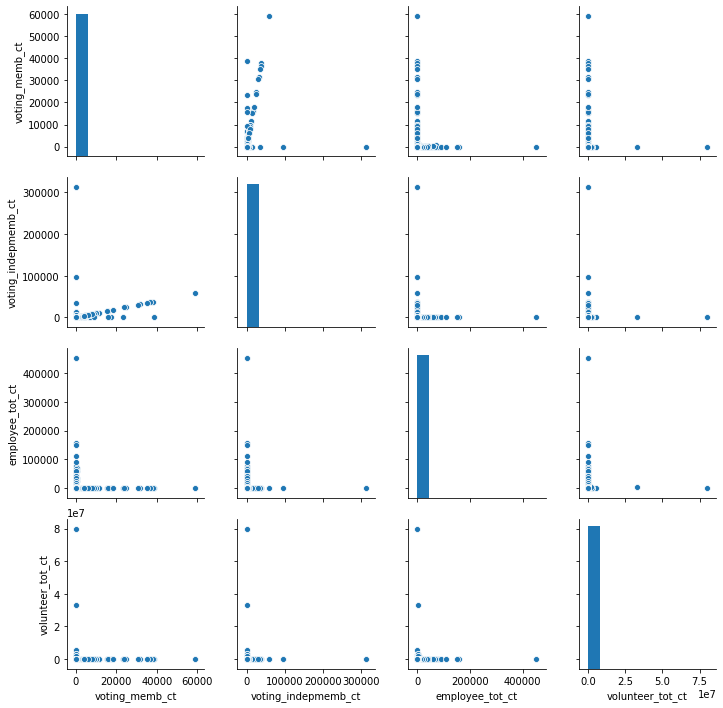

In [170]:
sns.pairplot(df[['voting_memb_ct',
   'voting_indepmemb_ct',
   'employee_tot_ct',
   'volunteer_tot_ct']])

## CLUSTERING ANALYSIS

In [4]:
# standard scale data before modeling
# X = pd.get_dummies(df)

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

In [3]:
# # find best DBSCAN parameters
# cluster_count = []
# sil_score = []
# eps_ = []
# min_samples_ = []

# for eps in [.1, .5, 1]:
#     for min_samples in [5, 10, 15]:
    
#         # Defining the agglomerative clustering
#         dbscan_cluster = DBSCAN(eps=eps, min_samples=min_samples)

#         # Fit model
#         clusters = dbscan_cluster.fit_predict(X_std)
        
#         # capture cluster count
#         cluster_count.append(len(set(clusters)) - (1 if -1 in clusters else 0))
        
#         # capture model fit
#         if pd.Series(clusters).nunique() > 1:
#             sil_score.append(round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3))
#         else:
#             sil_score.append(np.nan)
        
#         # record parameter values
#         eps_.append(eps)
#         min_samples_.append(min_samples)

In [2]:
# tabulate param results from above
# sort by silhouette score & cluster count
# cluster_scores = pd.DataFrame(list(list(zip(sil_score, cluster_count, eps_, min_samples_))), 
#             columns=['sil_score', 'cluster_count', 'eps', 'min_samples']) \
#         .sort_values(by=['sil_score', 'cluster_count'], ascending=False)

# cluster_scores

In [1]:
# plot silhouette score and cluster count
# fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10, 6))

# cluster_scores.loc[:,['sil_score']] \
#     .plot(kind='bar', color='green', legend=False, ax=ax0)
# ax0.set_title('SILHOUETTE SCORE', fontsize=15)


# cluster_scores.loc[:,['cluster_count']] \
#     .plot(kind='bar', legend=False, ax=ax1);
# ax1.set_title('CLUSTER COUNT', fontsize=15)

# plt.xticks(rotation=1);

## EXPORT CLUSTER LABELS

In [117]:
# df['ein'].to_csv('data_sets/ein.csv', index=False, header=True)